# Felipe Cardona - Tarea 2 - Regresión

## Importar dependencias necesarias.

In [18]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv("data/training_pruebas.csv", low_memory=False)

## 3. Lectura y carga de los datos
### Debido a la cantidad de que posee el dataset utilizaremos el atributo low_memory al momento de leer el excel con el fin de evitarnos problemas al cargar el dataset por primera vez.

# Punto 1.1: Exploración de datos - Análisis inicial
Empezaremos mostrando los datos que tiene el dataset y la estadistica descriptiva basica. Puesto que aun es complicado saber que datos decidiremos eliminar esto lo haremos mas adelante.

In [3]:
# Punto 1.1: Exploración de datos - Análisis inicial
data.info()  # Ver estructura y tipos de datos
print(data.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111430 entries, 0 to 111429
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_TIPODOCUMENTO              111430 non-null  object 
 1   ESTU_NACIONALIDAD               111430 non-null  object 
 2   ESTU_GENERO                     111430 non-null  object 
 3   ESTU_FECHANACIMIENTO            111430 non-null  object 
 4   ESTU_EXTERIOR                   111430 non-null  object 
 5   PERIODO                         111430 non-null  int64  
 6   ESTU_CONSECUTIVO                111430 non-null  object 
 7   ESTU_ESTUDIANTE                 111430 non-null  object 
 8   ESTU_PAIS_RESIDE                111430 non-null  object 
 9   ESTU_DEPTO_RESIDE               111430 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO           111430 non-null  int64  
 11  ESTU_MCPIO_RESIDE               111430 non-null  object 
 12  ESTU_COD_RESIDE_

## Para poder optimizar el recorrido en los datos y obtener mejores calculos, se considero necesario realizar el punto 3 en este momento. Por lo tanto procederemos a eliminar las variables que no son relevantes.

In [9]:
columnsToDrop = [
    'ESTU_CONSECUTIVO', 'INST_COD_INSTITUCION', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_MCPIO_RESIDE', 
    'ESTU_COD_RESIDE_MCPIO', 'ESTU_INST_MUNICIPIO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_PRESENTACIONCASA', 
    'ESTU_CURSOIESAPOYOEXTERNO','ESTU_CURSOIESEXTERNA', 'ESTU_SIMULACROTIPOICFES', 'ESTU_FECHANACIMIENTO',
    'ESTU_TIPODOCUMENTO', 'ESTU_NUCLEO_PREGRADO', 'ESTU_NUCLEO_PREGRADO_1', 'ESTU_ESTUDIANTE'
]
# 2. Eliminar las columnas del DataFrame
dataCleaned = data.drop(columns=columnsToDrop, errors='ignore')
print(dataCleaned.head())

  ESTU_NACIONALIDAD ESTU_GENERO ESTU_EXTERIOR  PERIODO ESTU_PAIS_RESIDE  \
0          COLOMBIA           M            NO    20231         COLOMBIA   
1          COLOMBIA           M            NO    20231         COLOMBIA   
2          COLOMBIA           F            NO    20231         COLOMBIA   
3          COLOMBIA           F            NO    20231         COLOMBIA   
4          COLOMBIA           F            NO    20231         COLOMBIA   

  ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO     ESTU_AREARESIDE  \
0         ATLANTICO                      8  Cabecera Municipal   
1            CALDAS                     17  Cabecera Municipal   
2            TOLIMA                     73  Cabecera Municipal   
3        LA GUAJIRA                     44  Cabecera Municipal   
4             VALLE                     76  Cabecera Municipal   

  ESTU_ESTADOCIVIL ESTU_TITULOOBTENIDOBACHILLER  ...  \
0          Soltero          Bachiller académico  ...   
1          Soltero          Bachiller ac

## Justificación del por que eliminar estas variables categoricas.

Se decidieron eliminar las siguientes variables debido a 4 agrupaciones o justificaciones en este caso.

*Identificadores y Consecutivos:*

- ESTU_CONSECUTIVO: Identificador único del estudiante.
- INST_COD_INSTITUCION, ESTU_SNIES_PRGMACADEMICO: Códigos numéricos para instituciones y programas.
*Ubicación demasiado específica o redundante:*

- ESTU_MCPIO_RESIDE y ESTU_COD_RESIDE_MCPIO: Usamos ESTU_DEPTO_RESIDE en su lugar.
- ESTU_INST_MUNICIPIO: Municipio exacto de la institución, preferimos el departamento.
- ESTU_MCPIO_PRESENTACION: Municipio de presentación, reemplazable por ESTU_DEPTO_PRESENTACION.

*Categorías vacías o con pocos datos:*

- ESTU_PRESENTACIONCASA: Solo 2 valores no nulos.
- ESTU_CURSOIESAPOYOEXTERNO, ESTU_CURSOIESEXTERNA, ESTU_SIMULACROTIPOICFES: La mayoría de sus valores son nulos.

*Fechas completas o detalles innecesarios:*

- ESTU_FECHANACIMIENTO: Ya calculamos la edad.
- ESTU_TIPODOCUMENTO: No aporta valor predictivo relevante.

*Información académica poco relevante:*

- ESTU_NUCLEO_PREGRADO, ESTU_NUCLEO_PREGRADO_1: Descripciones muy específicas que pueden no ser útiles.
- ESTU_ESTUDIANTE: Valor redundante sin variación.

## 1.2 Valores nulos para variables cuantitativas 
Entre los valores nulos encontrados esta la columna ESTU_NSE_INDIVIDUAL y ESTU_NSE_IES.

Debido a los valores obtenidos anterioremente del conjunto de datos y al comportamiento de estos, se decide imputar por la mediana.
Entre la justificación esta:
- La media es mayor que la mediana, lo que sugiere asimetría.
- La desviación estándar indica variabilidad en los datos.

In [5]:
print(dataCleaned.isnull().sum())
# En base a los valores nulos que tenemos vamos a imputarlos usando la medianada (utilizamos la que obtuvimos arriba).
dataCleaned.fillna(2.000000, inplace=True)

ESTU_NACIONALIDAD              0
ESTU_GENERO                    0
ESTU_EXTERIOR                  0
PERIODO                        0
ESTU_PAIS_RESIDE               0
                            ... 
PUNT_GLOBAL                    0
ESTU_INSE_INDIVIDUAL        3925
ESTU_NSE_INDIVIDUAL         3925
ESTU_NSE_IES                   0
ESTU_ESTADOINVESTIGACION       0
Length: 62, dtype: int64


# Subpunto 1.3: Crear variables dummy para variables categóricas relevantes

In [7]:
categoricalCols = dataCleaned.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(categoricalCols)}")

# 3. Convertir todas las columnas categóricas a variables dummy
dataWithDummies = pd.get_dummies(dataCleaned, drop_first=True)
dataWithDummies = dataWithDummies.fillna(0)

Columnas categóricas: ['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_EXTERIOR', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_AREARESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_TITULOOBTENIDOBACHILLER', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_CURSODOCENTESIES', 'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC', 'ESTU_TIPODOCUMENTOSB11', 'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA', 'FAMI_CUANTOSCOMPARTEBAÑO', 'ESTU_PAGOMATRICULA', 'ESTU_VLRULTIMOSEMESCURSADO', 'ESTU_PRESENTACIONSABADO

## 1.4: Calcular la correlación con 'PUNT_GLOBAL'
correlationMatrix = data.corr()
print(correlationMatrix['PUNT_GLOBAL'].sort_values(ascending=False))

In [24]:
correlationMatrix = dataWithDummies.corr() # Calcular la matriz de correlación
top10Variables = correlationMatrix['PUNT_GLOBAL'].sort_values(ascending=False).head(10).index
print(f"Las 10 variables más correlacionadas: {list(top10Variables)}") # Mostrar las 10 variables más correlacionadas con 'PUNT_GLOBAL'

Las 10 variables más correlacionadas: ['PUNT_GLOBAL', 'INST_CARACTER_ACADEMICO_UNIVERSIDAD', 'ESTU_NSE_IES', 'ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones', 'ESTU_METODO_PRGM_PRESENCIAL', 'ESTU_VLRULTIMOSEMESCURSADO_Mas de 7 millones', 'ESTU_NSE_INDIVIDUAL', 'INST_NOMBRE_INSTITUCION_UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÁ D.C.', 'FAMI_TIENEHORNOMICROOGAS_Si', 'ESTU_TIPODOCUMENTOSB11_TI']


## Visualizar la matriz de correlación como un mapa de calor.

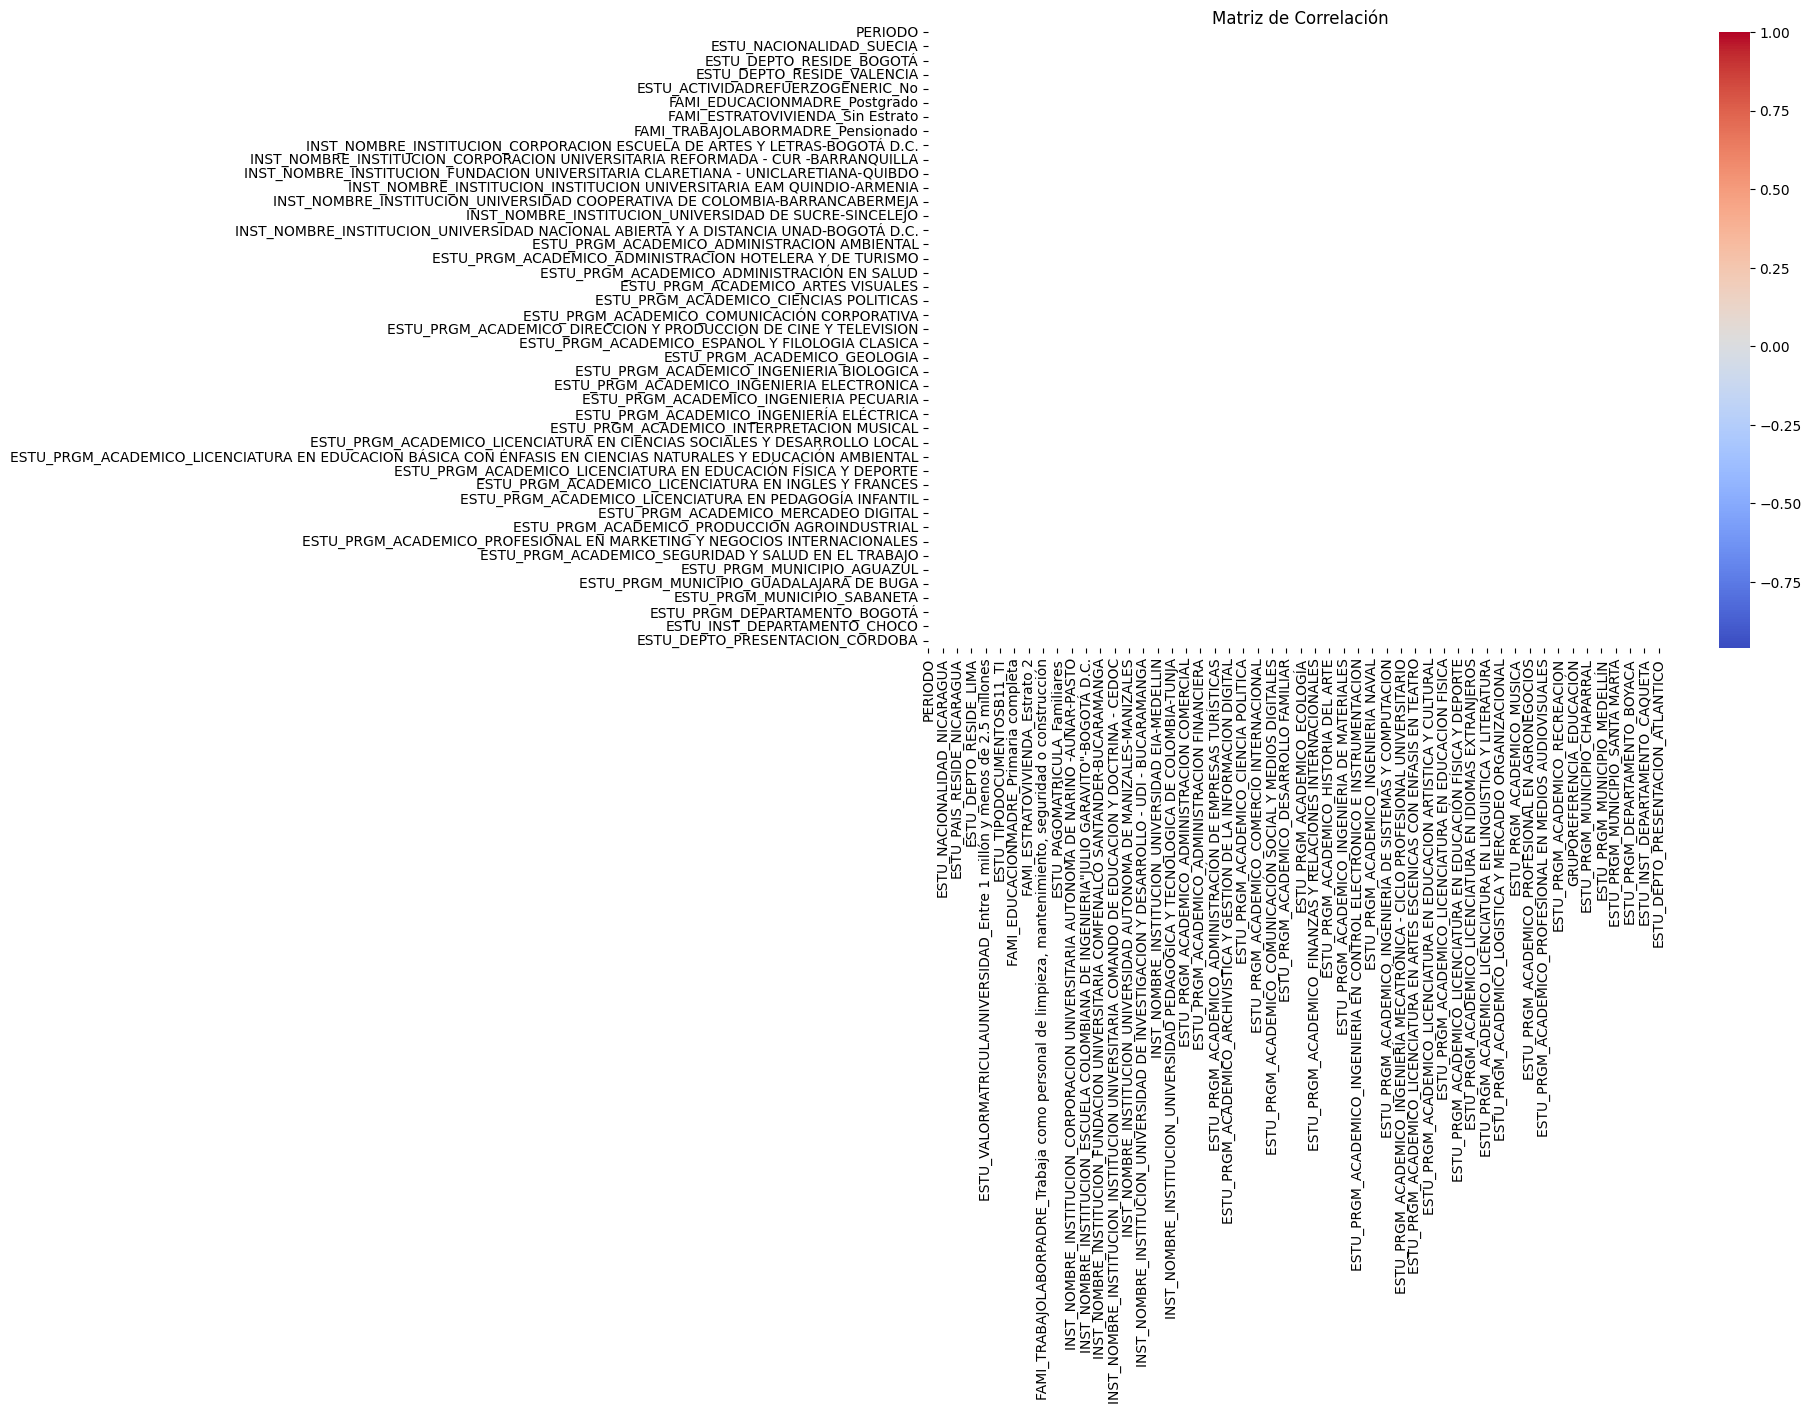

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## Generación de graficos para la exploración y representación de información mas relavante.

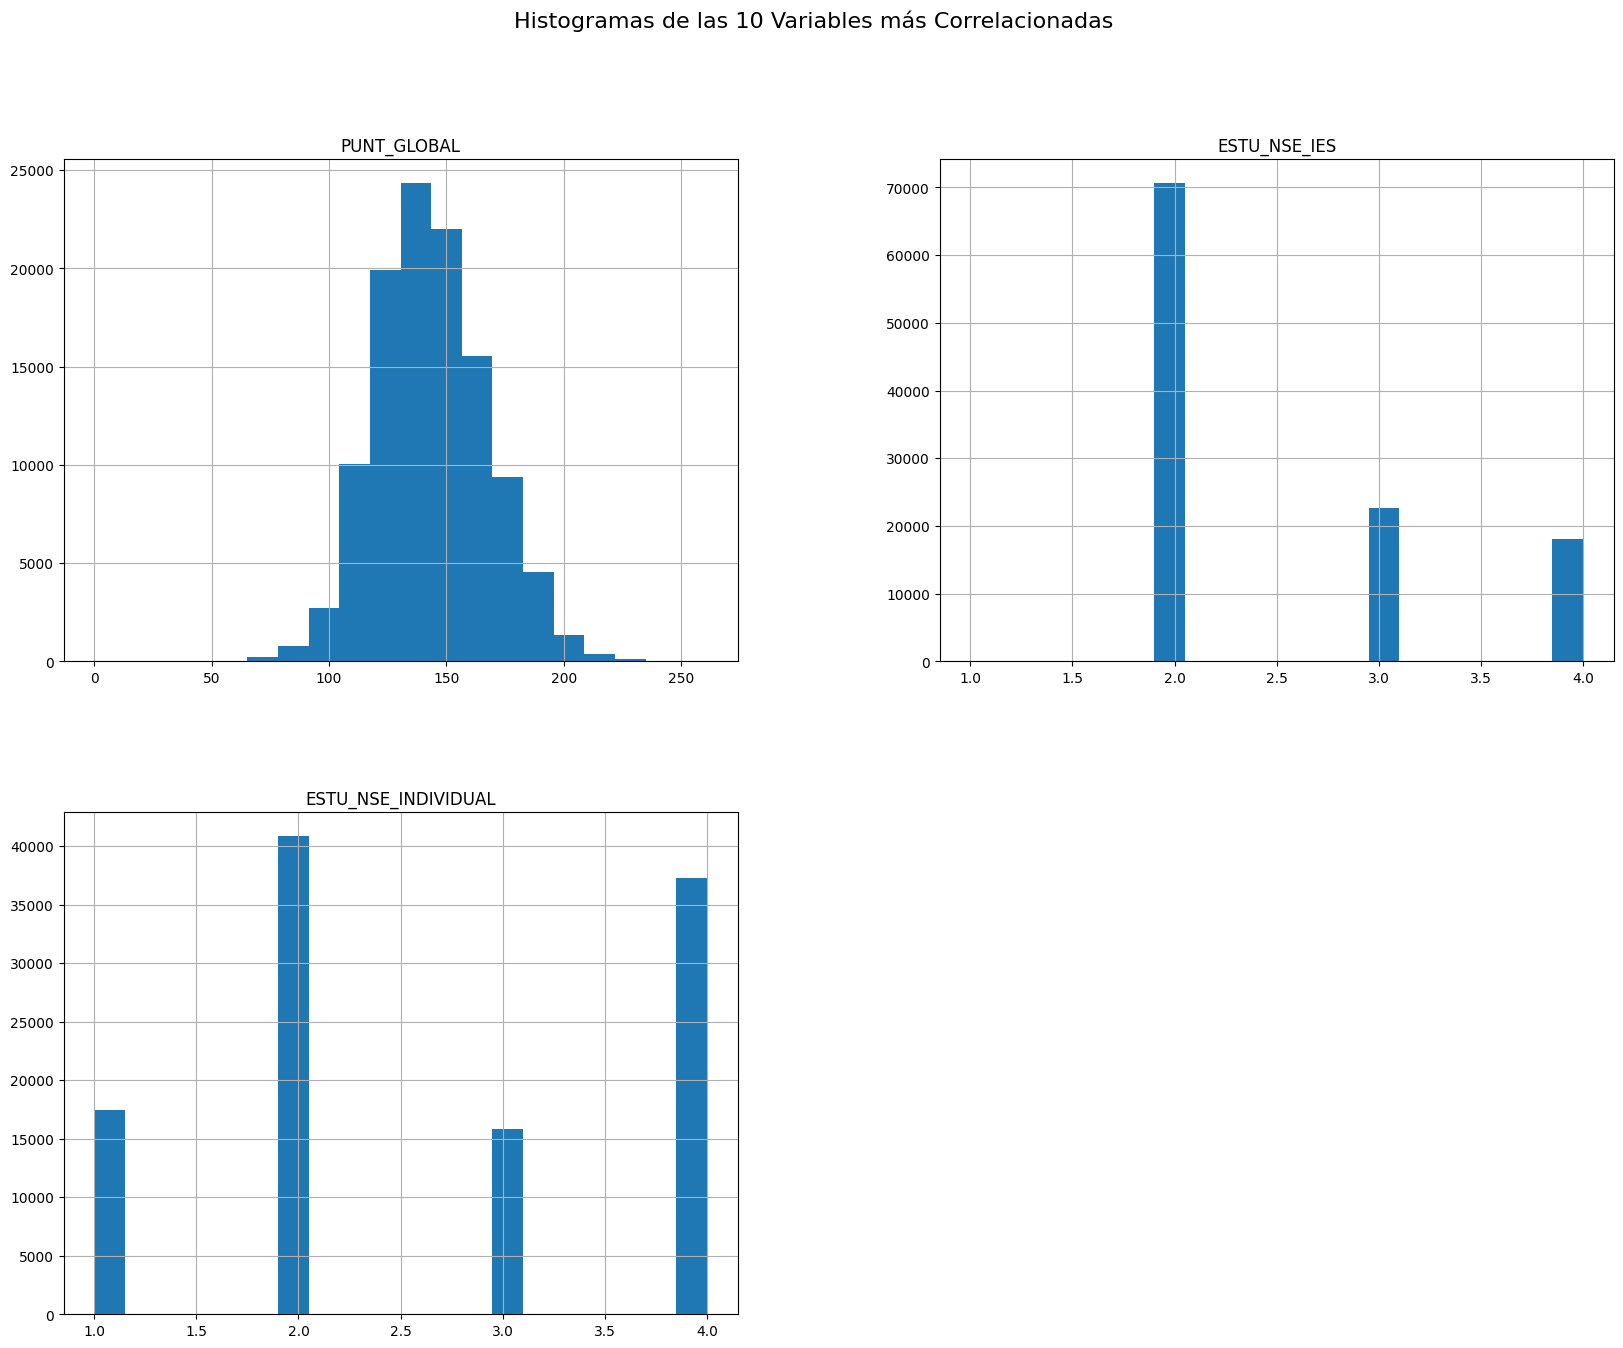

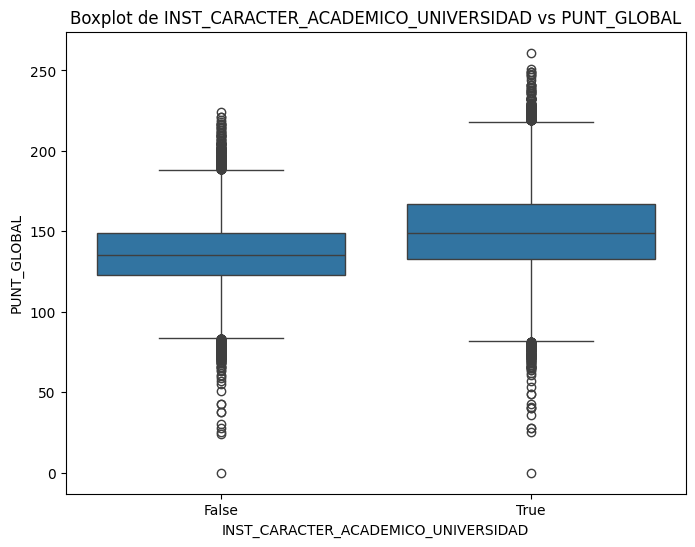

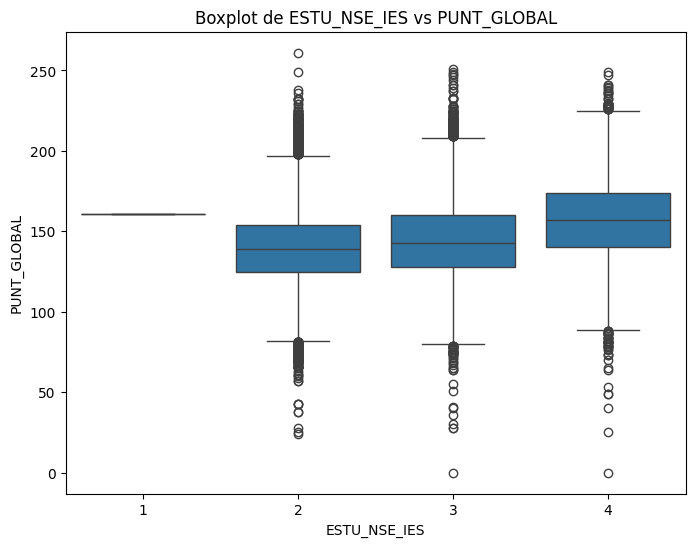

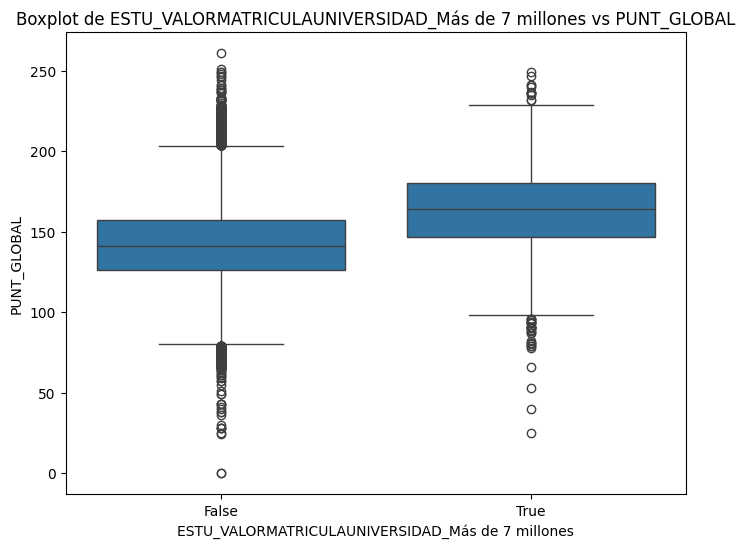

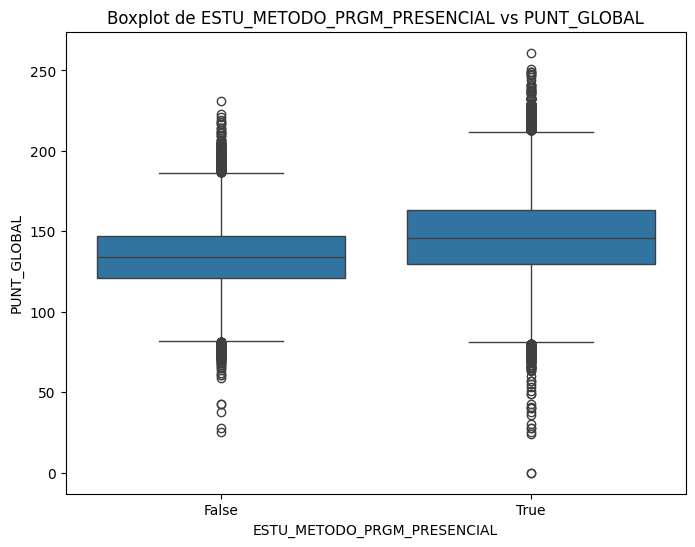

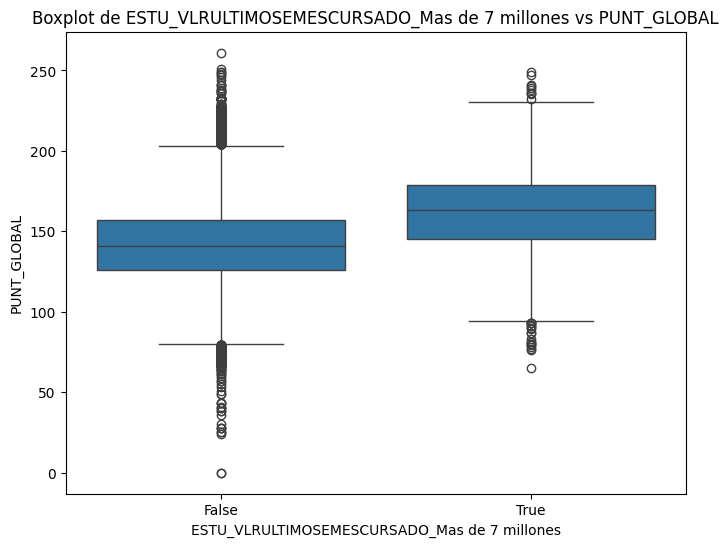

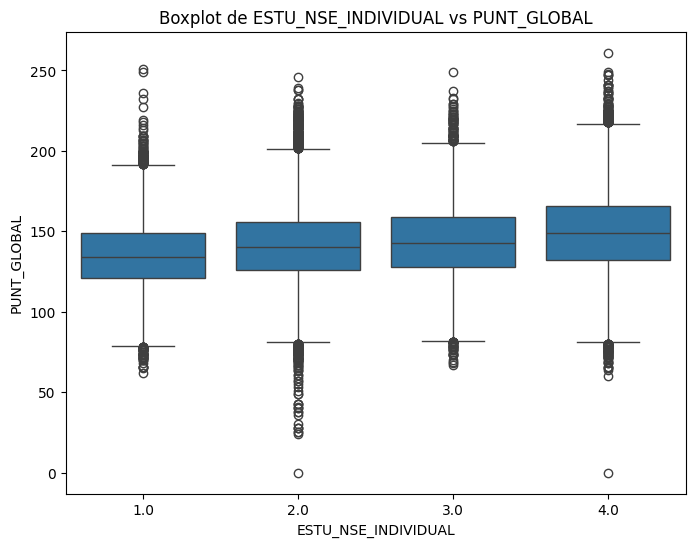

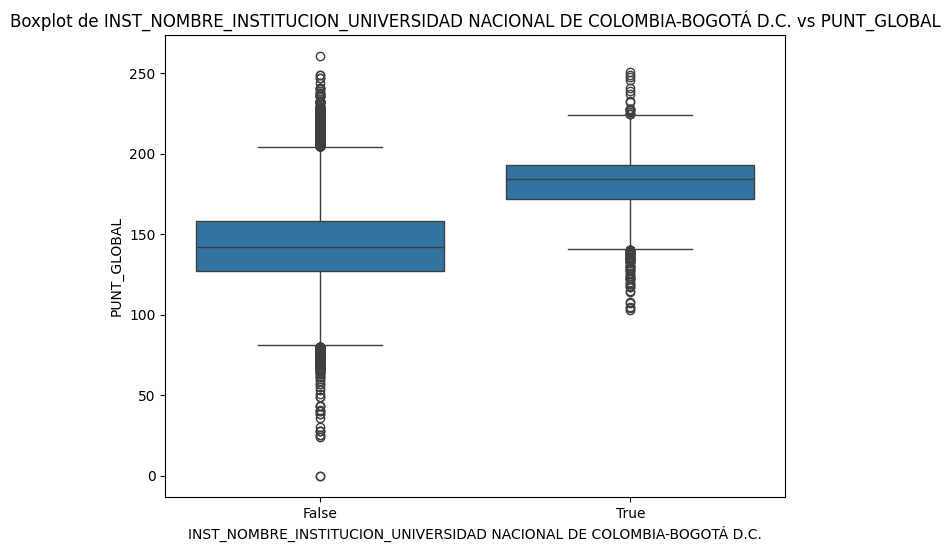

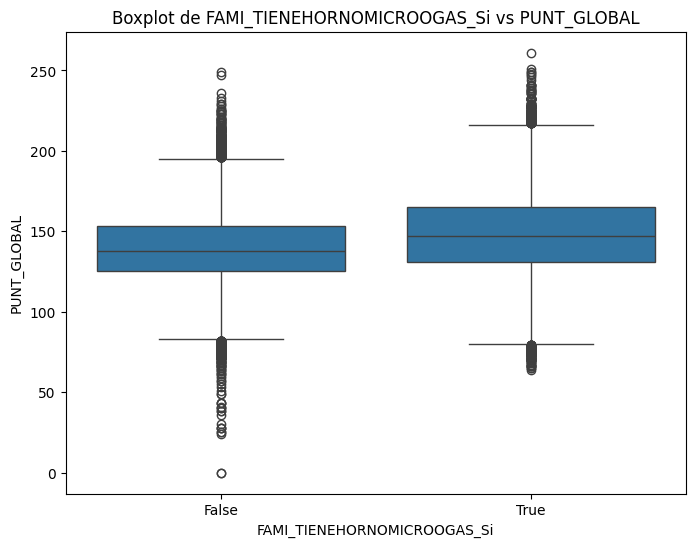

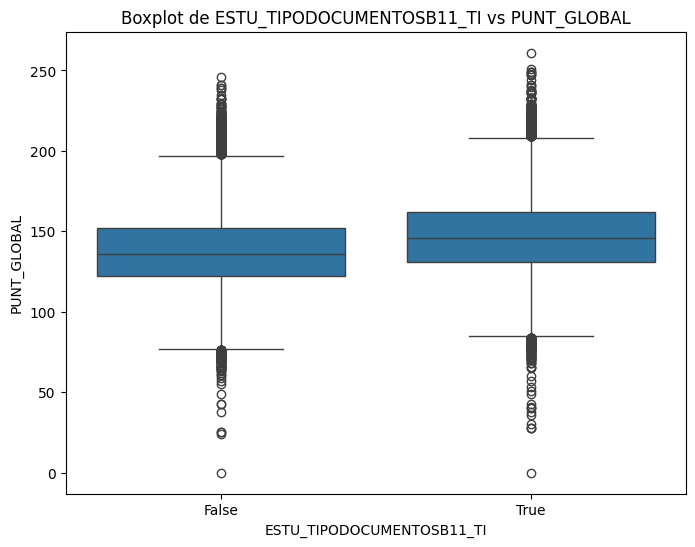

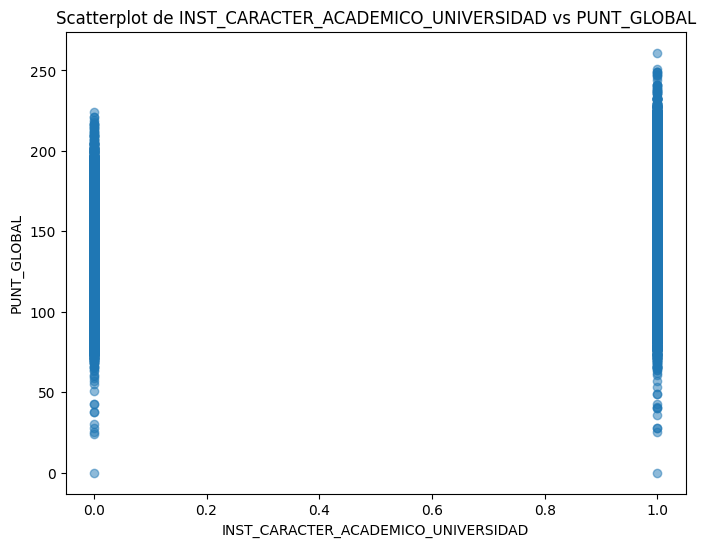

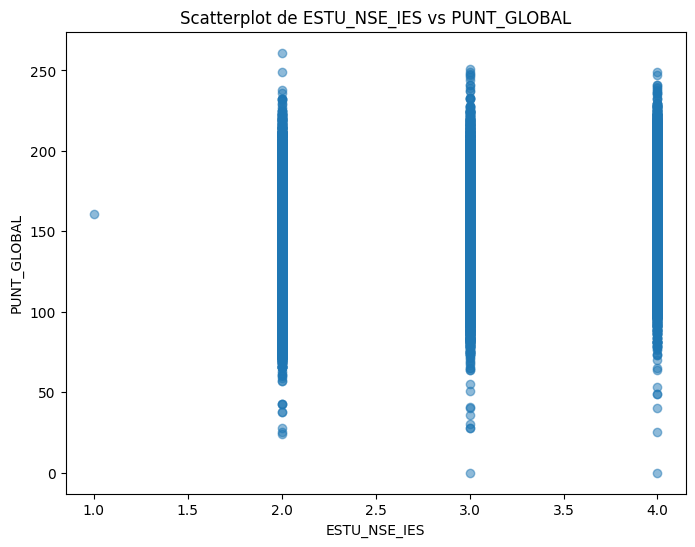

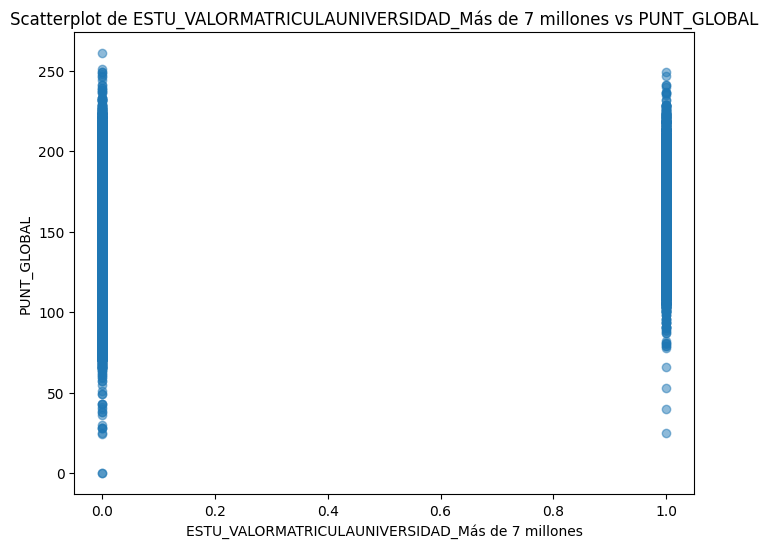

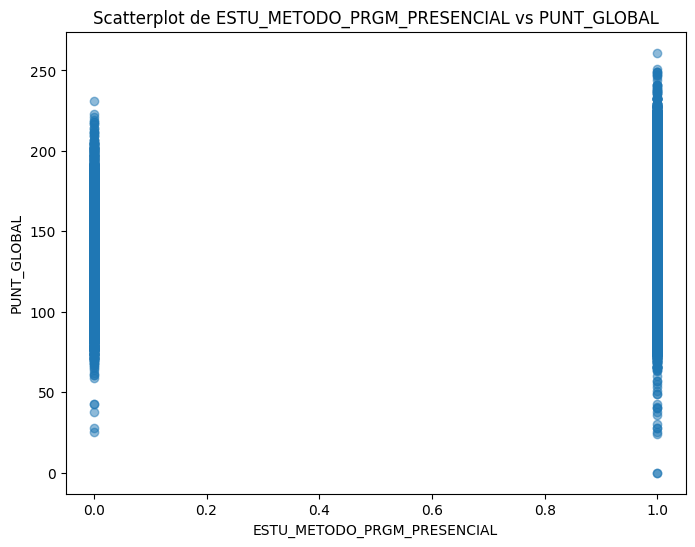

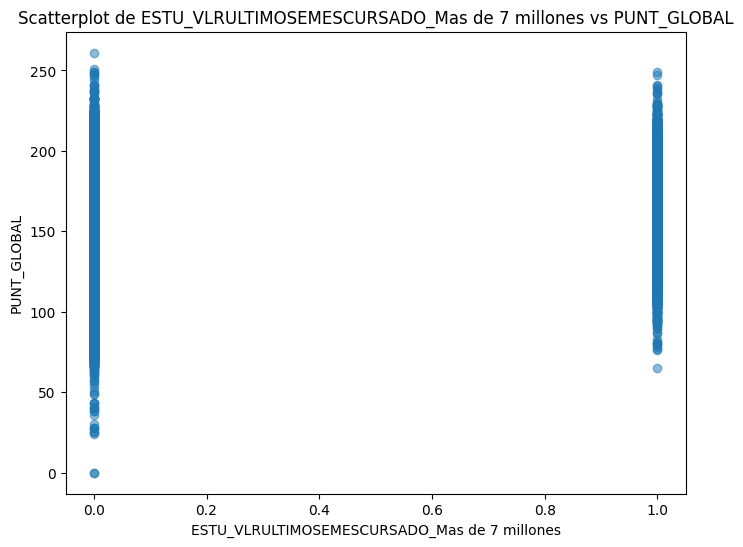

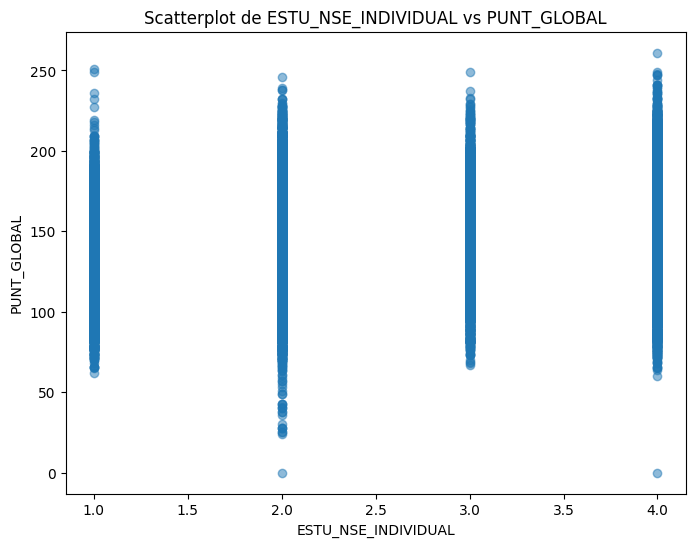

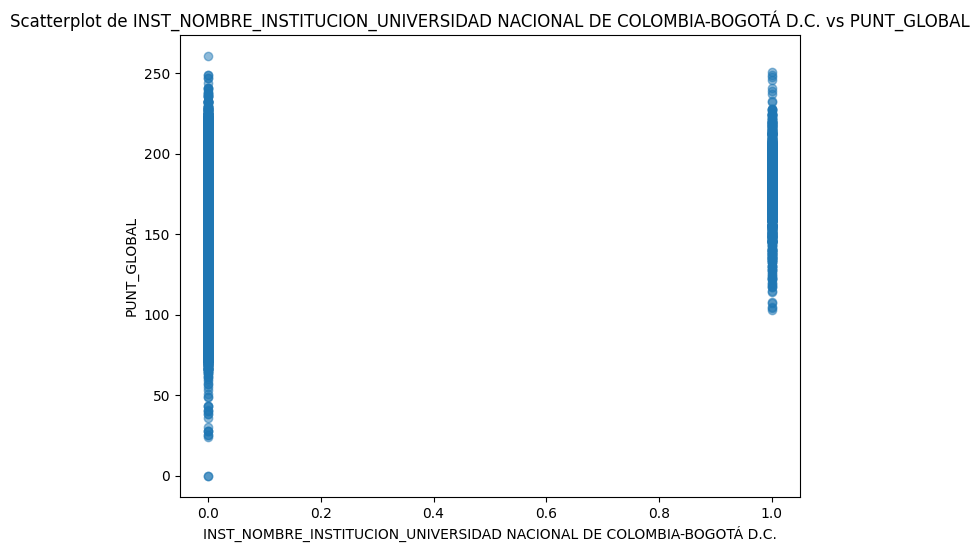

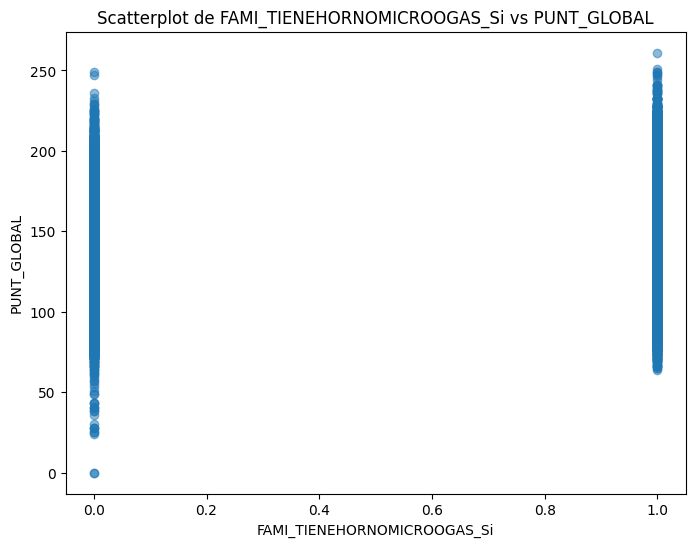

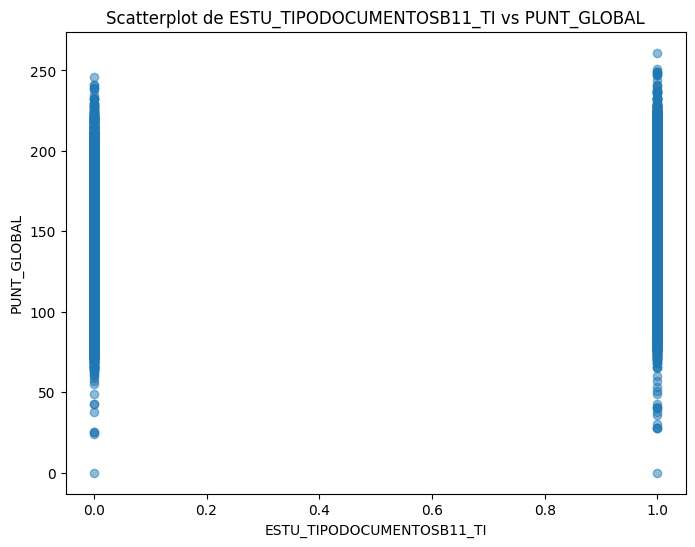

In [25]:
# Generar histogramas para las 10 variables con mejor correlación
dataWithDummies[top10Variables].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogramas de las 10 Variables más Correlacionadas', fontsize=16)
plt.show()

# Generar boxplots para cada variable en relación con 'PUNT_GLOBAL'
for column in top10Variables:
    if column != 'PUNT_GLOBAL':  # Evitar hacer boxplot de PUNT_GLOBAL consigo mismo
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=column, y='PUNT_GLOBAL', data=dataWithDummies)
        plt.title(f'Boxplot de {column} vs PUNT_GLOBAL')
        plt.show()

# Generar scatterplots para cada variable en relación con 'PUNT_GLOBAL'
for column in top10Variables:
    if column != 'PUNT_GLOBAL':  # Evitar scatterplot de PUNT_GLOBAL consigo mismo
        plt.figure(figsize=(8, 6))
        plt.scatter(dataWithDummies[column], dataWithDummies['PUNT_GLOBAL'], alpha=0.5)
        plt.title(f'Scatterplot de {column} vs PUNT_GLOBAL')
        plt.xlabel(column)
        plt.ylabel('PUNT_GLOBAL')
        plt.show()